<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Anteriores/MN2021_2_EDO_bvp01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada (EDO bvp)

**Nombre:** 

Jaime A. Valencia

Esteban Velilla

**Email:**

jalejandro.valencia@udea.edu.co

esteban.velilla@udea.edu.co

**Curso:**
Metodos numericos

**Fecha:**
Domingo 12 de diciembre del 2021

(Martes 14 de septiembre del 2021)

# Descripcion

**Objetivos:**

Solucion numerica de la ecuacion diferencial de segundo orden con condiciones de frontera que describe la curva Catenaria de un cable tendido entre 2 soportes. **Metodo del disparo.**

**Desarrollo:**

1.   Programacion de funcion
2.   Solucion con Scipy
3.   Representacion grafica
4.   Metodo busqueda de raiz
5.   Scipy-solve_bvp (???=


# Programacion de funcion



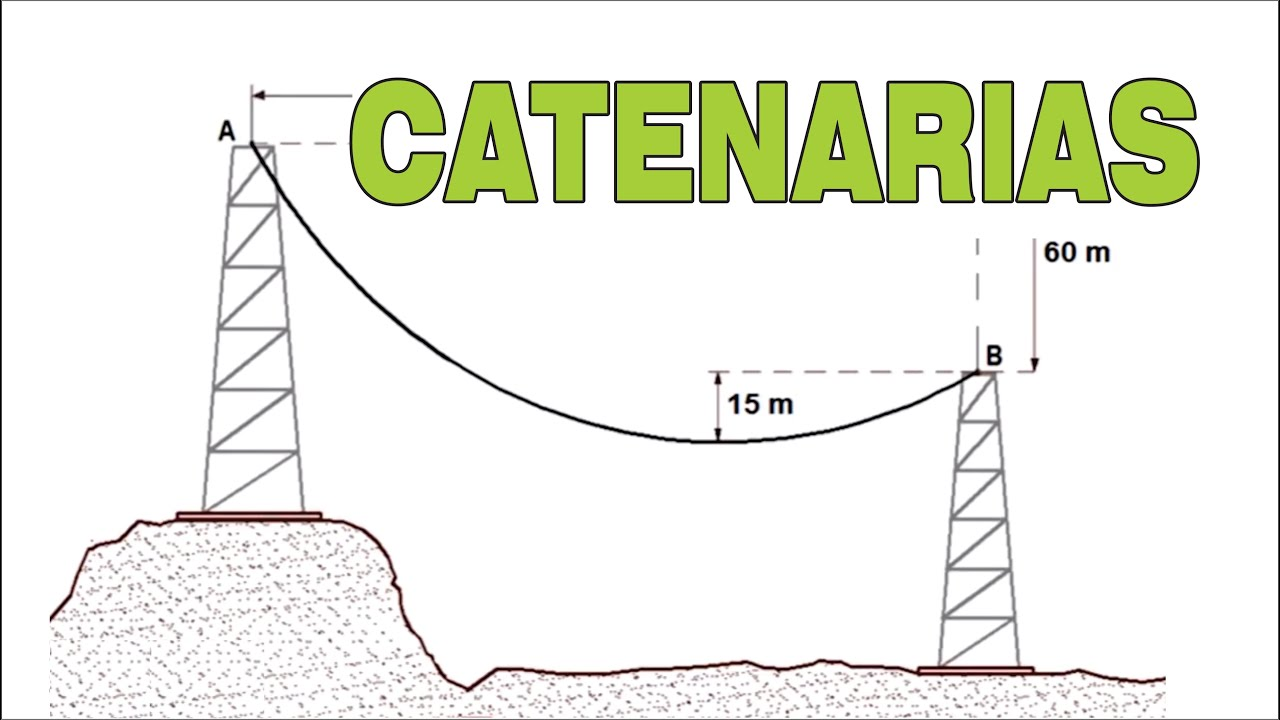

Cable tendido


$ \frac{d^{2}y}{dx^{2}} =  \frac{w_{0}}{T_{0}}\sqrt{1 + (\frac{dy}{dx})^{2}}  $

$y(0)= 40.0$

$y(700) = 180.0$

Cambio de variables para transformar la ED de orden 2 en una ED vectorial de orden 1.

$ \overline u = \begin{bmatrix}u_{0}, & u_{1} \ \end{bmatrix}=\begin{bmatrix}y, & y' \ \end{bmatrix} $

$ \frac{d}{dt}  \overline u = \begin{bmatrix}y', & y'' \ \end{bmatrix} = \begin{bmatrix}u_{1}, & \frac{w_{0}}{T_{0}}\sqrt{1 + (\frac{dy}{dx})^{2}}\ \end{bmatrix}$





In [ ]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def FunCaten01(U, x, wo=50,To=50000):
    """U: funcion vectorial dependiente de x
       x: variable independiente
       U = [y, y']
       
    """

    uo = U[0] 
    u1 = U[1] 
    d_uo = u1
    d_u1 = (wo/To)*np.sqrt(1+ u1**2)
    res = np.array([d_uo, d_u1])
    return res


# Solucion con scipy

In [ ]:
#condiciones de frontera
# condiciones de frontera
# altura en 0 = 40    altura en 700 = 180

#edicion de condiciones iniciales
u_o = 40.0
u_1 = -0.15588347452909163 ##esta condicion se debe variar hasta que 
        ##se cumpla la otra condicion de frontera 
        ## 180 en el otro extremo
Uo = [u_o, u_1]

print('Condiciones iniciales ', Uo)

##definir rango de solucion
x_inicial = 0
x_final= 700.0 #metros
sample = 20
X = np.linspace(x_inicial, x_final, sample)

print('Solucion entre ',x_inicial,' y ',x_final)

##Solucionar la ED
y_sol = odeint(FunCaten01, Uo, X)

print("Solucion de la ED y_sol",y_sol.shape)
print("y(700)-180: ",y_sol[-1,0]-180)

Condiciones iniciales  [40.0, -0.15588347452909163]
Solucion entre  0  y  700.0
Solucion de la ED y_sol (20, 2)
y(700)-180:  2.3106849766918458e-11


# Representacion grafica

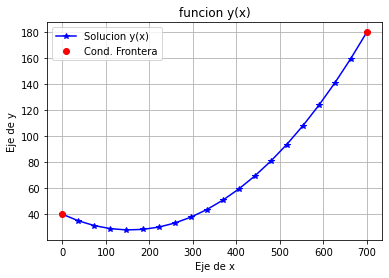

In [ ]:
#Graficar resultados usando Matplotlib
y_x = y_sol[:,0]
#dy_t = y_sol[:,1]

plt.figure(1)
plt.plot(X, y_x,"b*-",[X[0],X[-1]],[40,180],"ro")
plt.legend(["Solucion y(x)","Cond. Frontera"])
plt.title('funcion y(x)')
plt.xlabel('Eje de x')
plt.ylabel('Eje de y')
plt.grid(True)


plt.show()

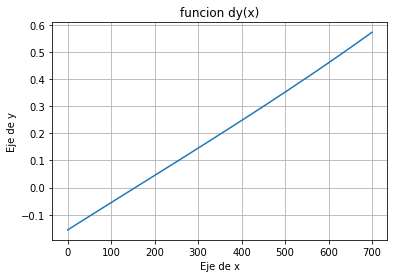

In [ ]:
#Graficar Derivada de la solucion
dy_x = y_sol[:,1]
#dy_t = y_sol[:,1]

plt.figure(1)
plt.plot(X, dy_x)

plt.title('funcion dy(x)')
plt.xlabel('Eje de x')
plt.ylabel('Eje de y')
plt.grid(True)

plt.show()

# Metodo Busqueda de RAIZ

In [ ]:
# Funcion de una sola variable
# para cada valor u_1 calculo: u_o - c.frontera

from scipy import optimize

def RDisparo01(alfa):
  u_o = 40.0
  u_1 = alfa ##esta condicion se debe variar hasta que 
          ##se cumpla la otra condicion de frontera u_o(2)= 2.0
  Uo = [u_o, u_1]
  ##definir rango de solucion
  t_inicial = 0; t_final= 700.0; sample = 20
  T = np.linspace(t_inicial, t_final, sample)

  ##Solucionar la ED
  y_sol = odeint(FunCaten01, Uo, T)

  error = y_sol[-1,0]- 180.0
  return error

##solucion con algoritmo de busqueda de raices escalares.

Sol_disparo0 = optimize.newton(RDisparo01,0)
Sol_disparo1 = optimize.root(RDisparo01,0)
print("Newton: ",Sol_disparo0)
print("root: ",Sol_disparo1.x)


Newton:  -0.15588347452909163
root:  [-0.15588347]


# Solucion con Scipy-solve_bvp (??)

Caso no exitoso con solve_bvp.


[solve_bvp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


objetivo logrado:  False


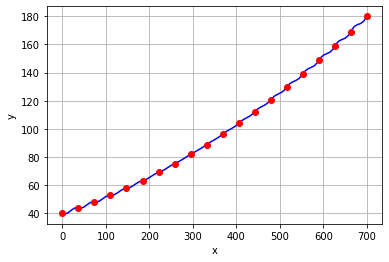

In [ ]:
from scipy.integrate import solve_bvp

#funcion dy = f(x,y) y = f(x)
#def fun(x, y):
#  return np.vstack((y[1], -np.exp(y[0])))

def fun(x, y, wo=50,To=50000):
    """U: funcion vectorial dependiente de x
       x: variable independiente
       U = [y, y']
       
    """

    uo = y[0] 
    u1 = y[1] 
    d_uo = u1
    d_u1 = (wo/To)*np.sqrt(1+ u1**2)
    res = np.array([d_uo, d_u1])
    return res

#Implement evaluation of the boundary condition residuals:

def bc(ya, yb):
  ya[0]= 40.0
  yb[0]= 180.0
  r_out = np.array([ya[0], yb[0]])
  return r_out

#Define the initial mesh with 5 nodes:

x = np.linspace(0, 700, 20)

#initial guesses for y.
p1 = np.polyfit([0,700],[40,180],2)
y_a1 = np.polyval(p1,x)

p2 = np.polyfit([0,700],[-0.2,0.7],1)
y_a2 = np.polyval(p2,x)

y_a = np.vstack((y_a1,y_a2))


# solucion
res_a = solve_bvp(fun, bc, x, y_a)

print("objetivo logrado: ",res_a.success)

#Grafico
x_plot = np.linspace(0, 700, 100)
y_plot_a = res_a.sol(x_plot)[0]
plt.plot(x_plot, y_plot_a, "b-")
plt.plot(res_a.x, res_a.y[0], "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.grid("on")
plt.show()

# Resultados y conclusiones

**Resultados y analisis:**


**Conclusiones:**


**Referencias:**

[Odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

[Burden&Faires 9ed](https://fac.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf)

[Scipy-optim](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)